In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
img=cv2.imread('D:\SEM 3\Fundamentals of Image Processing Lab\gojo.jpg')

In [16]:
img

array([[[27, 31, 12],
        [27, 31, 12],
        [26, 30, 11],
        ...,
        [ 6,  5,  1],
        [ 6,  5,  1],
        [ 6,  5,  1]],

       [[26, 30, 11],
        [26, 30, 11],
        [25, 29, 10],
        ...,
        [ 6,  5,  1],
        [ 6,  5,  1],
        [ 6,  5,  1]],

       [[25, 29, 10],
        [24, 28,  9],
        [24, 28,  9],
        ...,
        [ 6,  5,  1],
        [ 6,  5,  1],
        [ 6,  5,  1]],

       ...,

       [[15, 11,  6],
        [15, 11,  6],
        [15, 11,  6],
        ...,
        [16, 12,  7],
        [18, 12,  5],
        [18, 12,  5]],

       [[14, 10,  5],
        [14, 10,  5],
        [12,  8,  3],
        ...,
        [15, 11,  6],
        [17, 11,  4],
        [17, 11,  4]],

       [[14, 10,  5],
        [14, 10,  5],
        [12,  8,  3],
        ...,
        [15, 11,  6],
        [17, 11,  4],
        [17, 11,  4]]], dtype=uint8)

In [17]:
image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

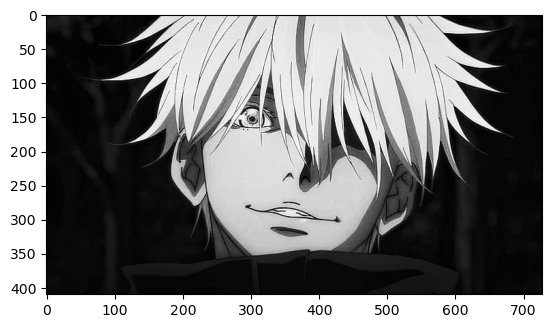

In [18]:
plt.imshow(image,cmap="gray")
plt.show()

In [19]:
# Generate  random noise
mean=0
stddev=30
noise=np.zeros(image.shape,np.uint8)
cv2.randn(noise,mean,stddev)


array([[ 0,  5,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, 53],
       [ 0, 68,  0, ...,  3,  0, 16],
       ...,
       [28,  0, 10, ..., 26, 19,  0],
       [ 4,  0, 24, ..., 33, 12,  7],
       [ 0,  7, 73, ...,  0,  0,  0]], dtype=uint8)

In [20]:
noisy_image=cv2.add(image,noise)

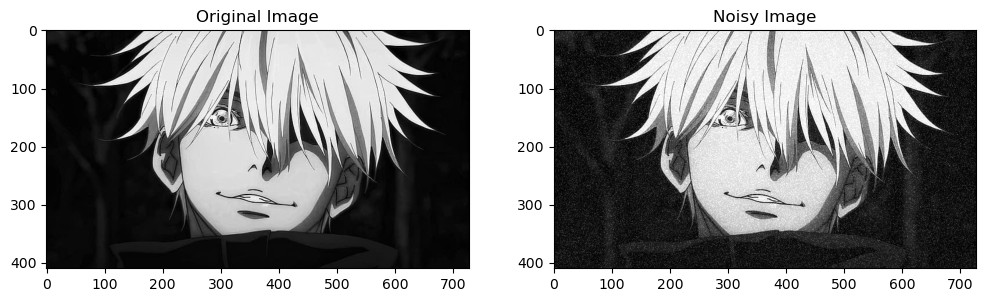

In [21]:
plt.figure(figsize=(12, 6)) 
plt.subplot(1,2,1)
plt.imshow(image,cmap="gray")
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(noisy_image,cmap="gray")
plt.title("Noisy Image")
plt.show()

In [22]:
kernel=np.ones((3,3),np.int32)/9
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [23]:
#filter 2D
filter_2D=cv2.filter2D(noisy_image,-1,kernel)

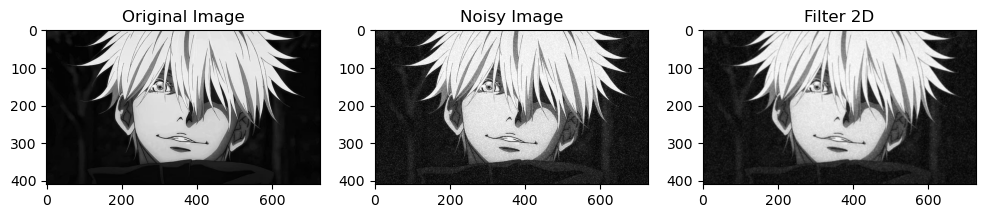

In [24]:
plt.figure(figsize=(12, 6)) 

plt.subplot(1,3,1)
plt.imshow(image,cmap="gray")
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(noisy_image,cmap="gray")
plt.title("Noisy Image")

plt.subplot(1,3,3)
plt.imshow(filter_2D,cmap="gray")
plt.title("Filter 2D")

plt.show()

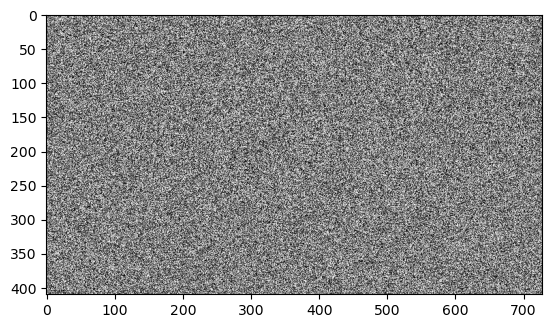

In [25]:
#Uniform noise
impulse_noise=np.zeros(image.shape,dtype=np.uint8)
cv2.randu(impulse_noise,0,255)
plt.imshow(impulse_noise,"gray")

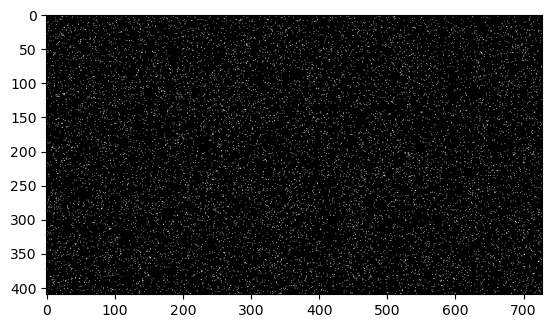

In [26]:
#impulse noise
impulse_noise=cv2.threshold(impulse_noise,245,255,cv2.THRESH_BINARY)[1]
plt.imshow(impulse_noise,cmap="gray")

In [27]:
impulse_noise_image=cv2.add(image,impulse_noise)

In [28]:
# Median filter
kernel_size=5
median_filter=cv2.medianBlur(impulse_noise_image, kernel_size)

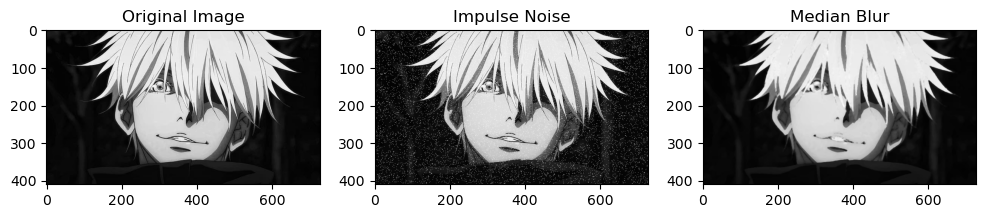

In [29]:
plt.figure(figsize=(12, 6)) 

plt.subplot(1,3,1)
plt.imshow(image,cmap="gray")
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(impulse_noise_image,cmap="gray")
plt.title("Impulse Noise")

plt.subplot(1,3,3)
plt.imshow(median_filter,cmap="gray")
plt.title("Median Blur")
plt.show()

In [30]:
#Gaussian Blur
gaussian_blur=cv2.GaussianBlur(noisy_image,(5,5),0)

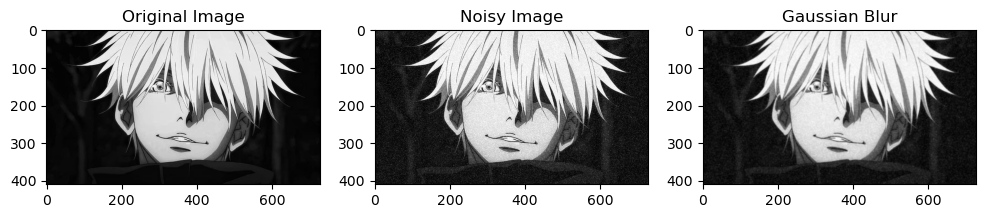

In [31]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(image,cmap="gray")
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(noisy_image,cmap="gray")
plt.title("Noisy Image")

plt.subplot(1,3,3)
plt.imshow(gaussian_blur,cmap="gray")
plt.title("Gaussian Blur")
plt.show()

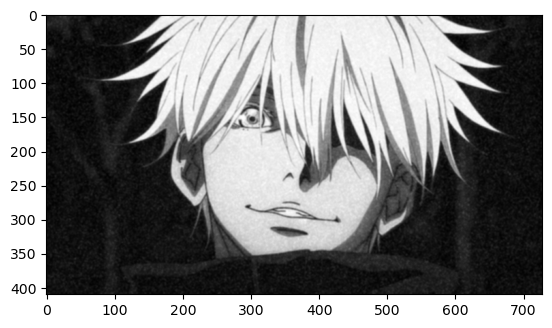

In [33]:
plt.imshow(gaussian_blur,cmap="gray")
plt.show()

In [34]:
# Sharpening
#Prewitt

kernelx=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

In [35]:
kernelx

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

In [36]:
kernely

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

In [37]:
image_pretwittx=cv2.filter2D(image,-1,kernelx)
image_pretwitty=cv2.filter2D(image,-1,kernely)

In [38]:
image_pretwitt=np.sqrt(np.square(image_pretwittx)+np.square(image_pretwitty))

Text(0.5, 1.0, 'Pretwitt')

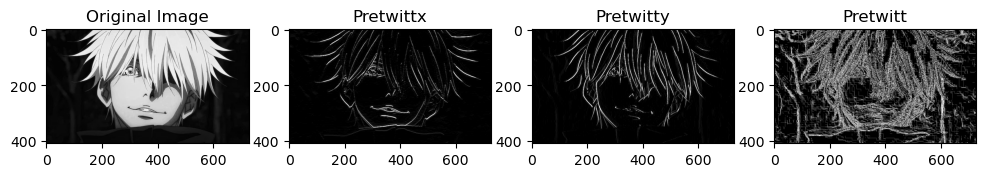

In [39]:
plt.figure(figsize=(12, 6)) 

plt.subplot(1,4,1)
plt.imshow(image,cmap="gray")
plt.title("Original Image")

plt.subplot(1,4,2)
plt.imshow(image_pretwittx,cmap="gray")
plt.title("Pretwittx")

plt.subplot(1,4,3)
plt.imshow(image_pretwitty,cmap="gray")
plt.title("Pretwitty")

plt.subplot(1,4,4)
plt.imshow(image_pretwitt,cmap="gray")
plt.title("Pretwitt")

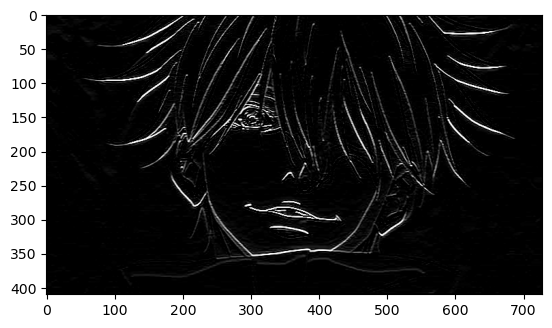

In [42]:
plt.imshow(image_pretwittx,cmap="gray")
plt.show()

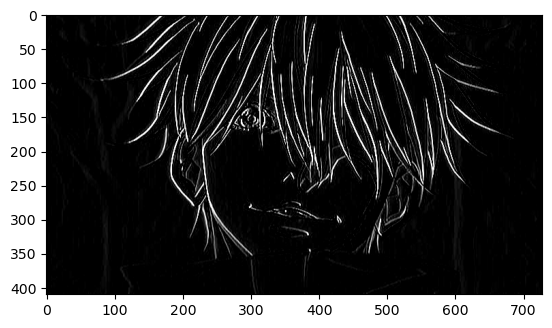

In [43]:
plt.imshow(image_pretwitty,cmap="gray")
plt.show()

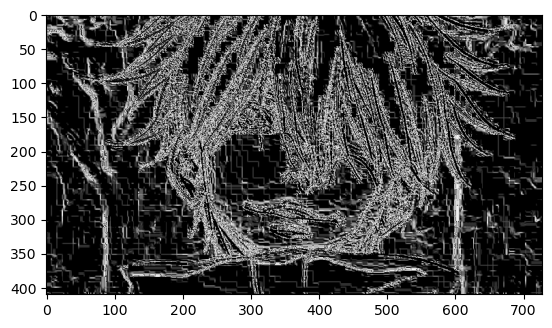

In [44]:
plt.imshow(image_pretwitt,cmap="gray")
plt.show()

In [45]:
# Sobel
sobel_kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
sobel_kernel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

In [46]:
sobel_kernel_x

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [47]:
sobel_kernel_y

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [48]:
sobel_x = cv2.filter2D(image, -1, sobel_kernel_x)
sobel_y = cv2.filter2D(image, -1, sobel_kernel_y)
image_sobel = np.sqrt(np.square(sobel_x) +np.square(sobel_y))

Text(0.5, 1.0, 'Sobel')

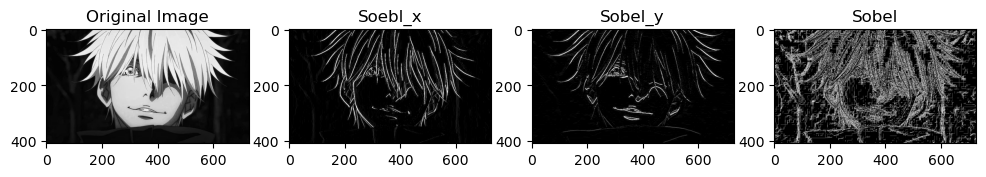

In [49]:
plt.figure(figsize=(12, 6)) 

plt.subplot(1,4,1)
plt.imshow(image,cmap="gray")
plt.title("Original Image")

plt.subplot(1,4,2)
plt.imshow(sobel_x,cmap="gray")
plt.title("Soebl_x")

plt.subplot(1,4,3)
plt.imshow(sobel_y,cmap="gray")
plt.title("Sobel_y")

plt.subplot(1,4,4)
plt.imshow(image_sobel,cmap="gray")
plt.title("Sobel")

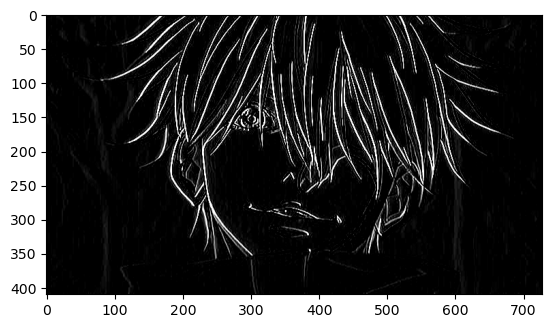

In [50]:
plt.imshow(sobel_x,cmap="gray")
plt.show()

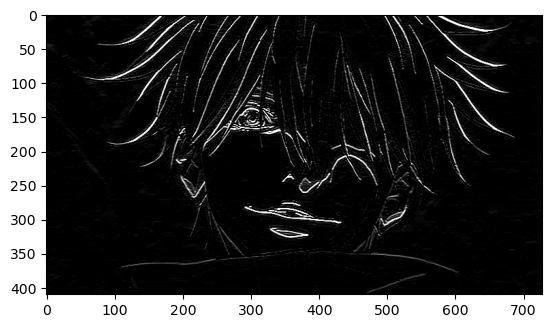

In [51]:
plt.imshow(sobel_y,cmap="gray")
plt.show()

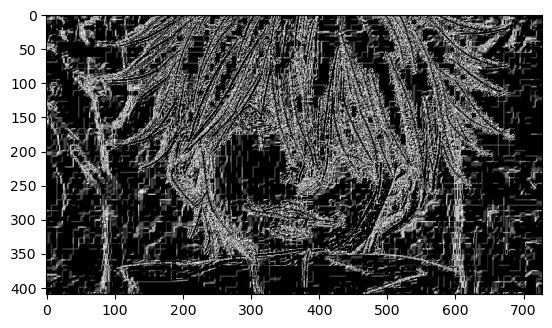

In [52]:
plt.imshow(image_sobel,cmap="gray")
plt.show()

In [53]:
#Robert
roberts_kernel_x = np.array([[0,0,0],[0,1,0],[0,0,-1]])
roberts_kernel_y = np.array([[0,0,0],[0, 0,1],[0,-1,0]])

In [54]:
roberts_kernel_x

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0,  0, -1]])

In [55]:
roberts_kernel_y

array([[ 0,  0,  0],
       [ 0,  0,  1],
       [ 0, -1,  0]])

In [56]:
Robert_x = cv2.filter2D(image, -1, roberts_kernel_x)
Robert_y = cv2.filter2D(image, -1, roberts_kernel_y)

In [57]:
robert_image=np.sqrt(np.square(Robert_x)+np.square(Robert_y))

Text(0.5, 1.0, 'Robert')

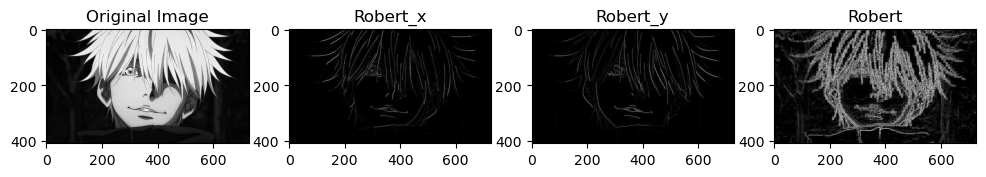

In [58]:
plt.figure(figsize=(12, 6)) 

plt.subplot(1,4,1)
plt.imshow(image,cmap="gray")
plt.title("Original Image")

plt.subplot(1,4,2)
plt.imshow(Robert_x,cmap="gray")
plt.title("Robert_x")

plt.subplot(1,4,3)
plt.imshow(Robert_y,cmap="gray")
plt.title("Robert_y")

plt.subplot(1,4,4)
plt.imshow(robert_image,cmap="gray")
plt.title("Robert")

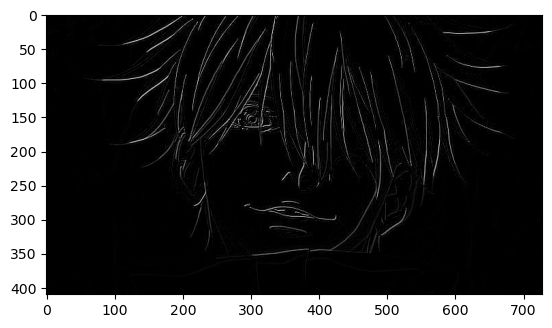

In [60]:
plt.imshow(Robert_x,cmap="gray")
plt.show()

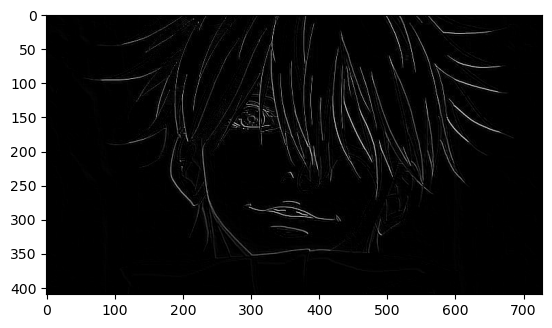

In [61]:
plt.imshow(Robert_y,cmap="gray")
plt.show()

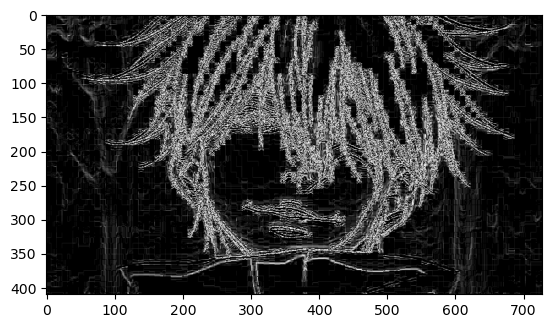

In [63]:
plt.imshow(robert_image,cmap="gray")
plt.show()

In [64]:
#Laplacian
laplacian_kernel=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
laplacian_image=cv2.filter2D(image, -1, laplacian_kernel)

Text(0.5, 1.0, 'Laplacian')

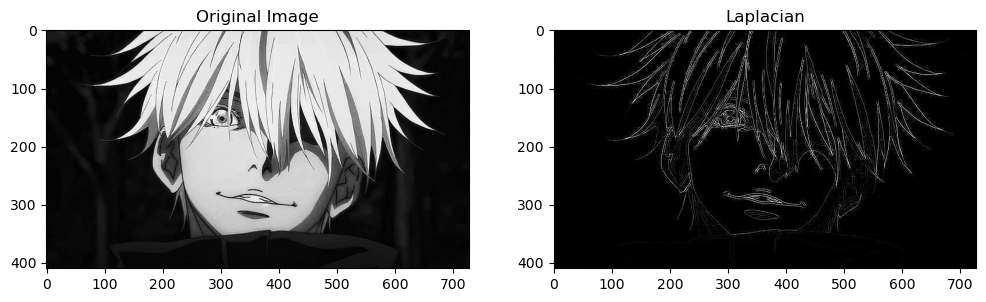

In [65]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(image,cmap="gray")
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(laplacian_image,cmap="gray")
plt.title("Laplacian")

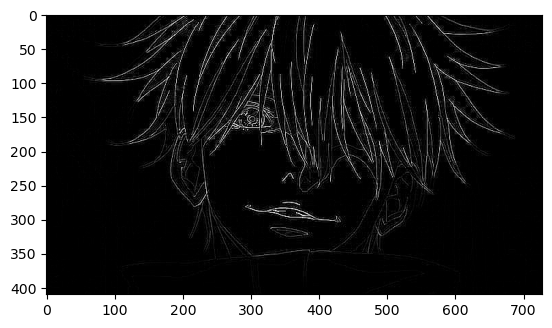

In [66]:
laplacian = cv2.Laplacian(image,-1)
plt.imshow(laplacian,'gray')